# Import bibliotek

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler

# Wybranie datasetu i podział na zbiory

In [2]:
def choose_dataset(train_data, test_data):
    train_data = train_data
    test_data = test_data
    return train_data, test_data

In [3]:
x = pd.read_csv("data/data2008.csv")
y = pd.read_csv('data/data2009.csv')

In [4]:
if (len(x)) > len(y):
    x = x[:len(y)]
else:
    y = y[:len(x)]

# Sprawdzenie istnienia brakujących wartości

In [5]:
x = x[x["RainTomorrow"].notna()]
y = y[y["RainTomorrow"].notna()]

# Wyświetl wartości kategoryczne i liczbowe

In [6]:
categorical = [col for col in x.columns if x[col].dtypes == 'O']

categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [7]:
numerical = [col for col in x.columns if x[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'Latitude',
 'Longitude',
 'Year',
 'Month',
 'Day']

# Odrzucanie wartości wysoce skorelowanych

In [8]:
x = x.drop(['Temp3pm', 'Temp9am', 'Humidity9am'], axis=1)
y = y.drop(['Temp3pm', 'Temp9am', 'Humidity9am'], axis=1)

In [9]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'RainToday', 'RainTomorrow', 'Latitude', 'Longitude', 'Year', 'Month',
       'Day'],
      dtype='object')

# Podział danych

In [10]:
X = x.drop(['RainTomorrow'], axis=1)

y = y['RainTomorrow']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((1816, 19), (454, 19))

# Zakodowanie zmiennej RainToday

In [12]:
encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

# Utworzenie zbioru treningowego.

In [13]:
print(X_train.columns)

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'RainToday_0', 'RainToday_1', 'Latitude', 'Longitude', 'Year', 'Month',
       'Day'],
      dtype='object')


In [14]:
numerical = [col for col in numerical if col not in ['Humidity9am', 'Temp9am', 'Temp3pm']]

X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location),
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

# Utworzenie zbioru testowego.

In [15]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                    pd.get_dummies(X_test.Location),
                    pd.get_dummies(X_test.WindGustDir),
                    pd.get_dummies(X_test.WindDir9am),
                    pd.get_dummies(X_test.WindDir3pm),], axis=1)

In [16]:
cols = X_train.columns

In [17]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [18]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [19]:
X_test = pd.DataFrame(X_test, columns=[cols])

# Trenowanie modelu

In [20]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

# Kodowanie zmiennych kategorycznych

In [21]:
'''from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cleaned_data['Location'] = le.fit_transform(cleaned_data['Location'])
cleaned_data['WindDir9am'] = le.fit_transform(cleaned_data['WindDir9am'])
cleaned_data['WindDir3pm'] = le.fit_transform(cleaned_data['WindDir3pm'])
cleaned_data['WindGustDir'] = le.fit_transform(cleaned_data['WindGustDir'])
'''

"from sklearn import preprocessing\nle = preprocessing.LabelEncoder()\ncleaned_data['Location'] = le.fit_transform(cleaned_data['Location'])\ncleaned_data['WindDir9am'] = le.fit_transform(cleaned_data['WindDir9am'])\ncleaned_data['WindDir3pm'] = le.fit_transform(cleaned_data['WindDir3pm'])\ncleaned_data['WindGustDir'] = le.fit_transform(cleaned_data['WindGustDir'])\n"

In [22]:
X_train.columns


MultiIndex([(      'MinTemp',),
            (      'MaxTemp',),
            (     'Rainfall',),
            ('WindGustSpeed',),
            ( 'WindSpeed9am',),
            ( 'WindSpeed3pm',),
            (  'Humidity3pm',),
            (  'Pressure9am',),
            (  'Pressure3pm',),
            (     'Latitude',),
            (    'Longitude',),
            (         'Year',),
            (        'Month',),
            (          'Day',),
            (  'RainToday_0',),
            (  'RainToday_1',),
            (     'Adelaide',),
            (       'Albany',),
            (       'Albury',),
            ( 'AliceSprings',),
            (     'Ballarat',),
            (      'Bendigo',),
            (     'Brisbane',),
            (       'Cairns',),
            (     'Canberra',),
            (       'Darwin',),
            (    'GoldCoast',),
            (       'Hobart',),
            (   'Launceston',),
            (    'Melbourne',),
            ( 'MountGambier',),
        

# Predykcja wyników

In [23]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 

In [24]:
logreg.predict_proba(X_test)[:, 0]

array([0.80017958, 0.77380476, 0.80634579, 0.91917824, 0.76843062,
       0.87802217, 0.54978483, 0.8883132 , 0.8090902 , 0.90264311,
       0.78077107, 0.8291152 , 0.76570392, 0.77030553, 0.86280241,
       0.80273344, 0.84028946, 0.81416666, 0.93535677, 0.75155714,
       0.92702963, 0.69433048, 0.86525796, 0.89490271, 0.91148673,
       0.90345781, 0.83721746, 0.6283113 , 0.9170668 , 0.7888236 ,
       0.75586276, 0.68149181, 0.86019021, 0.9028826 , 0.89322398,
       0.84102651, 0.84643304, 0.75824925, 0.70112454, 0.71827476,
       0.82652935, 0.78208658, 0.86467668, 0.59236614, 0.94638718,
       0.89544862, 0.73364139, 0.753904  , 0.90961396, 0.91451832,
       0.80327432, 0.67799581, 0.82517697, 0.87827711, 0.53400698,
       0.6956787 , 0.83008735, 0.88214169, 0.77897731, 0.62719832,
       0.9289196 , 0.87604549, 0.88344211, 0.65023185, 0.96036081,
       0.94151164, 0.84402918, 0.69923605, 0.89773926, 0.95119813,
       0.35822382, 0.70227895, 0.87934416, 0.9069285 , 0.93489

In [25]:
logreg.predict_proba(X_test)[:, 1]

array([0.19982042, 0.22619524, 0.19365421, 0.08082176, 0.23156938,
       0.12197783, 0.45021517, 0.1116868 , 0.1909098 , 0.09735689,
       0.21922893, 0.1708848 , 0.23429608, 0.22969447, 0.13719759,
       0.19726656, 0.15971054, 0.18583334, 0.06464323, 0.24844286,
       0.07297037, 0.30566952, 0.13474204, 0.10509729, 0.08851327,
       0.09654219, 0.16278254, 0.3716887 , 0.0829332 , 0.2111764 ,
       0.24413724, 0.31850819, 0.13980979, 0.0971174 , 0.10677602,
       0.15897349, 0.15356696, 0.24175075, 0.29887546, 0.28172524,
       0.17347065, 0.21791342, 0.13532332, 0.40763386, 0.05361282,
       0.10455138, 0.26635861, 0.246096  , 0.09038604, 0.08548168,
       0.19672568, 0.32200419, 0.17482303, 0.12172289, 0.46599302,
       0.3043213 , 0.16991265, 0.11785831, 0.22102269, 0.37280168,
       0.0710804 , 0.12395451, 0.11655789, 0.34976815, 0.03963919,
       0.05848836, 0.15597082, 0.30076395, 0.10226074, 0.04880187,
       0.64177618, 0.29772105, 0.12065584, 0.0930715 , 0.06510

# Dokładność

In [26]:
print('Model accuracy score: {0:0.4f}'. format(
    accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8194


# Macierz pomyłek

In [27]:
cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0, 0])

print('\nTrue Negatives(TN) = ', cm[1, 1])

print('\nFalse Positives(FP) = ', cm[0, 1])

print('\nFalse Negatives(FN) = ', cm[1, 0])

Confusion matrix

 [[371   3]
 [ 79   1]]

True Positives(TP) =  371

True Negatives(TN) =  1

False Positives(FP) =  3

False Negatives(FN) =  79


# Wizualizacja macierzy pomyłek z heatmapą seaborn


<Axes: >

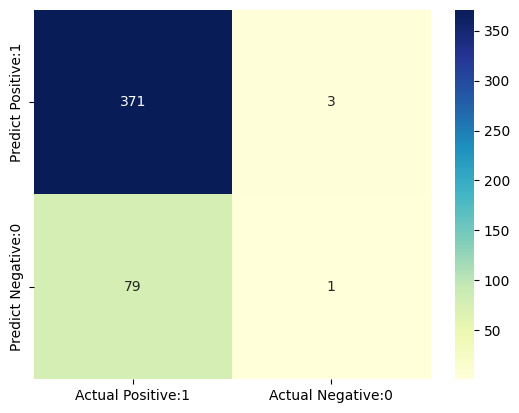

In [28]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Dokładność klasyfikatora


In [29]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8194


# Precyzja klasyfikatora

In [30]:
precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9920


In [31]:
y_pred1 = logreg.predict_proba(X_test)[:, 1]

# Krzywa ROC

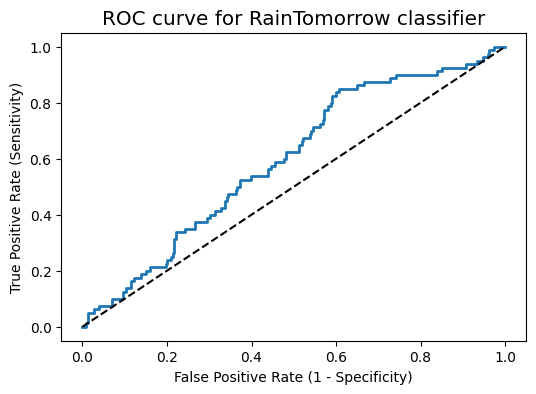

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label='Yes')

plt.figure(figsize=(6, 4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Eskport modelu

In [35]:
filename = "model.h5"
pickle.dump(logreg, open(filename, 'wb'))
pickle.dump(encoder, open('encoder.pkl', 'wb'))
model_columns = list(X_train.columns)
with open('model_columns.pkl', 'wb') as file:
    pickle.dump(model_columns, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


In [34]:
total_features = len(numerical) - len(['Temp3pm', 'Temp9am', 'Humidity9am'])
total_features += 2
total_features += sum([len(x[column].unique()) for column in categorical])
print(total_features)

91
